In [1]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 20.23 MiB/s, done.
Resolving deltas: 100% (381/381), done.


In [2]:
%cd segment-anything-2
!pip install -e .

/content/segment-anything-2
Obtaining file:///content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.6 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp312-cp312-linux_x86_64.whl size=13864 sha256=c5f754b214caff9688cd3f01cf6a27da8c09e08c8810580c00b09caca9635161
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_jgmdjr/wheels/25/16/48/fa81b09c6f921b052cf2192c7fe593106bf3b30cd55b918197
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=0166446a37a1684245c35e05b514aa894cdec0137aab2489d47876ab7cf2a473
  Stored in dire

In [3]:
import sam2, os
print(os.path.dirname(sam2.__file__))

/content/segment-anything-2/sam2


In [4]:
!ls sam2/configs/sam2.1

sam2.1_hiera_b+.yaml  sam2.1_hiera_s.yaml
sam2.1_hiera_l.yaml   sam2.1_hiera_t.yaml


In [5]:
!pwd

/content/segment-anything-2


In [6]:
%cd checkpoints
!./download_ckpts.sh
%cd /content/segment-anything-2

/content/segment-anything-2/checkpoints
--2026-02-05 22:22:22--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   252MB/s    in 0.6s    

2026-02-05 22:22:23 (252 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2026-02-05 22:22:23--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 2

In [7]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.9.0+cu126
Torchvision version: 0.24.0+cu126
CUDA is available: True


In [8]:
!pip install -q supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00


In [9]:
!gdown -O "/content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 61.4MB/s]


In [10]:
!ffmpeg -y -i "/content/121364_0.mp4" -t 5 -c:v libx264 -preset fast -crf 23 -c:a aac -b:a 128k "/content/out_5s.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [11]:
import cv2
import torch

import numpy as np
import supervision as sv

from pathlib import Path
from PIL import Image
from typing import Optional
from IPython.display import Video

from sam2.build_sam import build_sam2_video_predictor

In [28]:
%cd ..
HOME = Path.cwd()
print("HOME:", HOME)

/content
HOME: /content


In [31]:
%cd segment-anything-2

/content/segment-anything-2


In [13]:
DEVICES = [torch.cuda.current_device()]

In [14]:
help(build_sam2_video_predictor)

Help on function build_sam2_video_predictor in module sam2.build_sam:

build_sam2_video_predictor(config_file, ckpt_path=None, device='cuda', mode='eval', hydra_overrides_extra=[], apply_postprocessing=True, vos_optimized=False, **kwargs)



In [17]:
from hydra import initialize_config_dir
from hydra.core.global_hydra import GlobalHydra

# reset Hydra if it was already used (important in notebooks)
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

initialize_config_dir(
    config_dir="/content/segment-anything-2/sam2/configs",
    job_name="sam2"
)

The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1


hydra.initialize_config_dir()

In [19]:
checkpoint = "/content/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "sam2.1/sam2.1_hiera_l.yaml"

predictor = build_sam2_video_predictor(
    config_file=model_cfg,
    checkpoint=checkpoint,
    device=DEVICES
)

In [29]:
VIDEO_NAME = "out_5s.mp4" # <--- CHECK THIS NAME
SOURCE_VIDEO = HOME / VIDEO_NAME
SOURCE_FRAMES = HOME / SOURCE_VIDEO.stem

SOURCE_FRAMES.mkdir(parents=True, exist_ok=True)

In [30]:
!ffmpeg -i {SOURCE_VIDEO} -q:v 2 -start_number 0 {SOURCE_FRAMES}/'%05d.jpg'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [70]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [71]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [92]:
# 1. Run this to get a widget to draw your box
#import base64 # will ignoer
from jupyter_bbox_widget import BBoxWidget
frame_idx = 0

def encode_image(filepath):
    with open(filepath, "rb") as f:
        return f.read()
try:
        widget = BBoxWidget()
        widget.image_bytes = encode_image(str(SOURCE_FRAMES / f"{frame_idx:05d}.jpg"))
        #widget.classes = ["Target"]

        print(f"Loaded: {str(SOURCE_FRAMES / f"{frame_idx:05d}.jpg")}")
        print("Draw your box on the image below:")
        display(widget)
except Exception as e:
        print(f"Widget Error: {e}")

Loaded: /content/out_5s/00000.jpg
Draw your box on the image below:


In [93]:
BOX_COORDINATES = [
        widget.bboxes[0]['x'],
        widget.bboxes[0]['y'],
        widget.bboxes[0]['x'] + widget.bboxes[0]['width'],
        widget.bboxes[0]['y'] + widget.bboxes[0]['height']
              ]
print(" coordinates:",BOX_COORDINATES )

 coordinates: [774, 528, 803, 587]


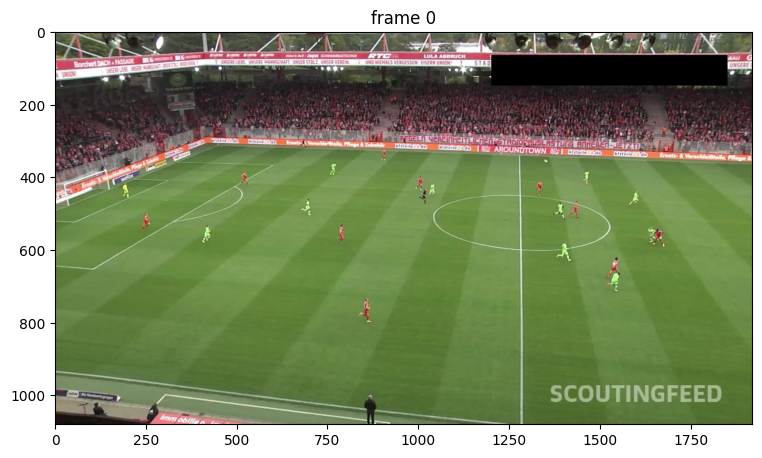

In [94]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir =   SOURCE_FRAMES

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

In [74]:
inference_state = predictor.init_state(video_path=str(SOURCE_FRAMES))

frame loading (JPEG): 100%|██████████| 125/125 [00:07<00:00, 15.74it/s]


In [89]:
predictor.reset_state(inference_state)

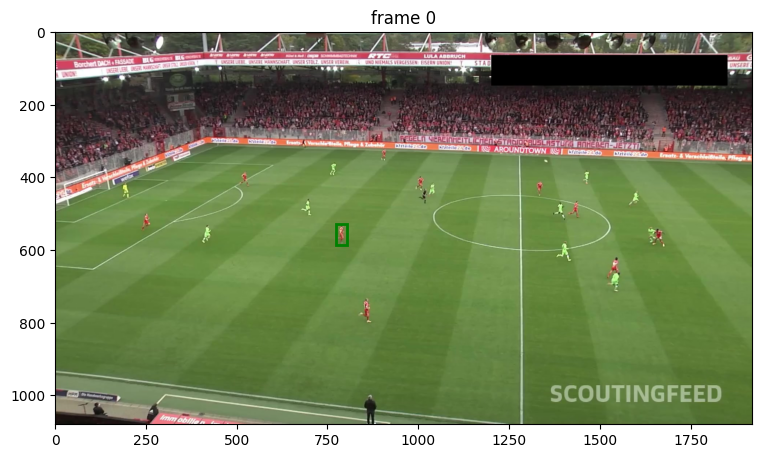

In [95]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 4  # give a unique id to each object we interact with (it can be any integers)

# Let's add a box at (x_min, y_min, x_max, y_max) = (300, 0, 500, 400) to get started
box = np.array(BOX_COORDINATES, dtype=np.float32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    box=box
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_box(box, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

propagate in video: 100%|██████████| 125/125 [01:58<00:00,  1.06it/s]


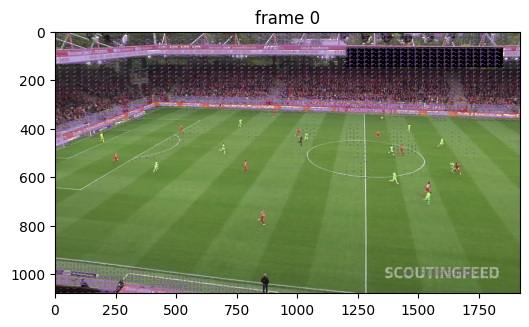

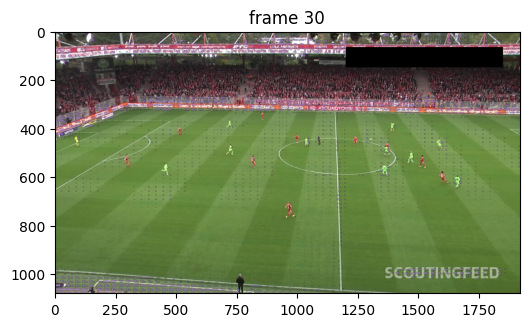

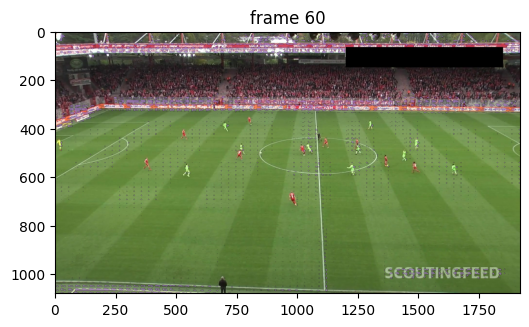

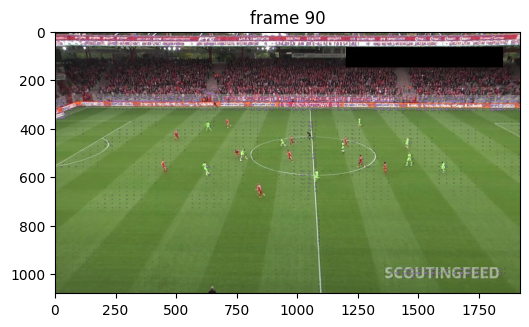

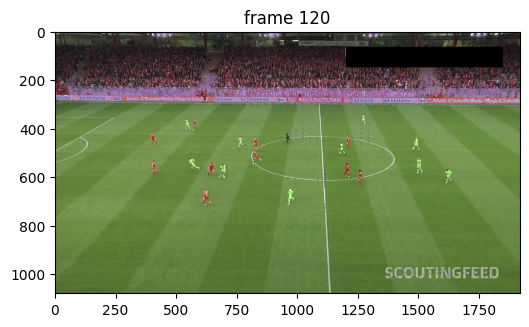

In [96]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)